In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
from sklearn.datasets import load_boston 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
import warnings 
warnings.filterwarnings('ignore')
import math

In [4]:
boston = load_boston() 
print("Keys:", boston.keys()) 
print("Shape:", boston.data.shape) 
print("Columns", boston.feature_names) 

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Shape: (506, 13)
Columns ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['PRICE'] = boston.target 
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


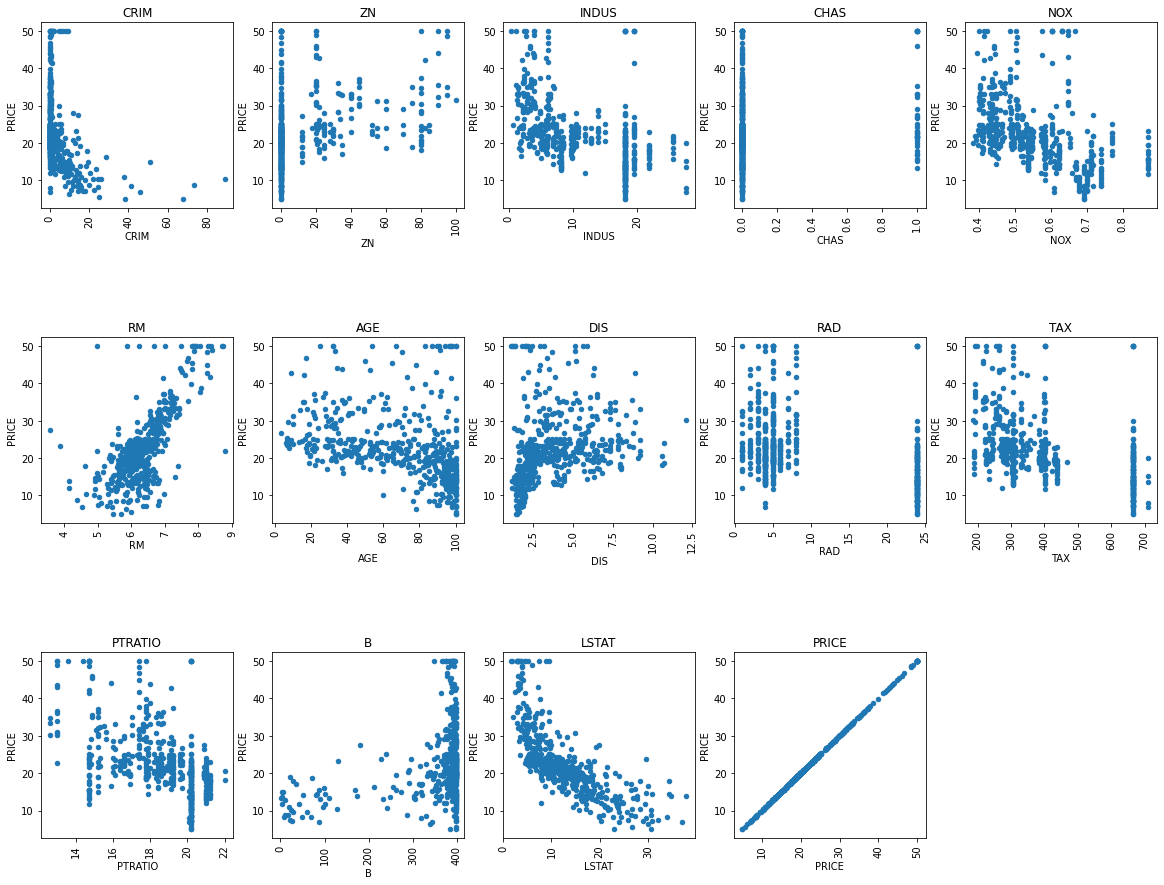

In [9]:
fig = plt.figure(figsize=(20,15))
cols = 5 
rows = math.ceil(float(bos.shape[1]) / cols) 
for i, column in enumerate(bos.columns):
    axs = fig.add_subplot(rows, cols, i + 1) 
    axs.set_title(column) 
    bos.plot(kind='scatter', x=column, y='PRICE', ax=axs) 
    plt.xticks(rotation="vertical") 
    plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [10]:
y = bos['PRICE']
X = bos.drop('PRICE', axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(np.reshape(y_train.values,(-1,1))) 
y_test = y_scaler.transform(np.reshape(y_test.values,(-1,1)))

In [19]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
y_pred = model.predict(X_test)
print("Test Accuracy:", format(metrics.r2_score(y_test, y_pred) * 100, '.2f'), '%')
print("Mean Squared Error:", format(metrics.mean_squared_error(y_test, y_pred), '.5f'))

Test Accuracy: 86.15 %
Mean Squared Error: 0.11814


In [22]:
parameters = {"min_samples_split": [2, 5, 10], 
              "max_depth": [None, 2, 5, 10], 
              "min_samples_leaf": [1, 3, 5], 
              "max_features": ['auto', 'sqrt', 'log2'], 
              "n_estimators": [50, 75, 100] }

grid_search = GridSearchCV(RandomForestRegressor(), param_grid=parameters, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters set found on development set:\n")
print(grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters set found on development set:

{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [23]:
print("Accuracy for test data set:\n")
y_pred = grid_search.predict(X_test)
print("Test Accuracy:", format(metrics.r2_score(y_test, y_pred) * 100, '.2f'), '%')
print("Mean Squared Error:", format(metrics.mean_squared_error(y_test, y_pred), '.5f'))

Accuracy for test data set:

Test Accuracy: 86.47 %
Mean Squared Error: 0.11547


In [28]:
import pickle

with open('randmfrst_model.sav', 'wb') as f:
    pickle.dump(grid_search,f)
    
with open('xscaler.sav','wb') as f:
    pickle.dump(X_scaler,f)
    
with open('yscaler.sav','wb') as f:
    pickle.dump(y_scaler,f)

In [26]:
X_test[:1]

array([[-0.40602392, -0.50338975,  2.1919337 , -0.24470439,  0.20234041,
        -0.43062642,  0.72473405, -0.86218515, -0.86791372, -1.29462611,
         0.31674133,  0.30528413,  0.27108889]])

In [30]:
y_scaler.inverse_transform([0.4])

array([26.34557186])

In [33]:
grid_search.multimetric_

False